<i>Status: Draft</i>

Examples
https://github.com/PacktPublishing/Graph-Machine-Learning/blob/main/Chapter01/02_Graph_metrics.ipynb

In [33]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import pandas as pd
import node2vec as n2v
import karateclub as kc
import random
import stellargraph as sp
from IPython.display import Image
from gem.embedding.gf import GraphFactorization
from pathlib import Path
Path("gem/intermediate").mkdir(parents=True, exist_ok=True)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [34]:
def draw_graph(G, node_names={}, node_size=500):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=True, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    #nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    plt.show()

<b>Observe</b>Unsupervised popular

Ref - Machine leanring on Graphs, Model and Comprehensive Taxonoy

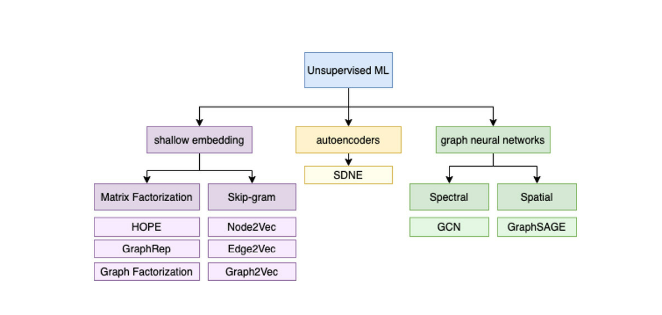

In [35]:
Image("../Images/G4_1.PNG")

### Shallow embedding methods

<b>Observe</b>: Use Matrix factorisation


<b>Let</b> $W \in \mathbb{R}^{m \times n} $ be input data

Matrix factorisation decomposes $$W \approx V \times H$$ 

with  a source matrix

$$V \in \mathbb{R}^{m \times d} $$ 

and an abundance matrix 

$$H \in \mathbb{R}^{d \times n}$$

where $d$ is the number of dimensions of the generated embedding space

Matrix factorisation algorithm lerns $V$ and $H$ by minimisng that changes depending on problem context. 

Loss function defined by the computing reconstructino error using the Frobenius norm: 

$$  ||W - V \times H||_F^2 $$

<b>Observe</b>: All unsupervised embedding algorithms factorise input graph expressed as matrix in different components, mainly differentiated by loss function.

<b>Observe</b>Loss function will emphasis specific properties of input graph

<b>Observe</b>: Specific method is <b>Graph Factorisation</b>. To do this: 

<b>Let</b> $G = (V, E)$ be a graph

<b>Let</b> $A \in \mathbb{R}^{|V| \times |V|} $ be the adjacency matrix of $G$

<b>Let</b> $L$ be the loss function: 

$$L = \frac{1}{2}\Sigma_{(i, j) \in E} (A_{i, j} - Y_{i,:} Y_{j,:}^T)^2  + \frac{\lambda}{2} \Sigma_i ||Y_{i,:}||^2$$

where $(i, j) \in E$ are edges and $Y \in \mathbb{R}^{|V| \times d} $ is matrix with d-dimensional embedding and each row of matrix is an embedding of a given node




<b>Example</b>

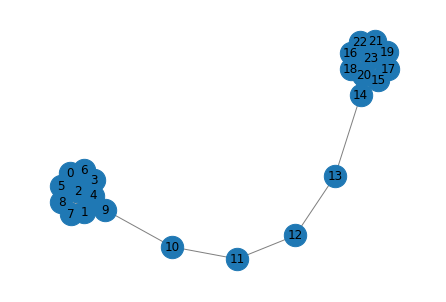

[Errno 2] No such file or directory: 'gem/c_exe/gf'
./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission
		Iter id: 0, Objective: 95.007, f1: 95.0028, f2: 0.00416708


(array([[-0.00100042,  0.0027991 ],
        [-0.00099787,  0.00279907],
        [-0.00100074,  0.00279749],
        [-0.00101316,  0.00279368],
        [-0.00098794,  0.00283771],
        [-0.00093376,  0.00264775],
        [-0.00093735,  0.00290007],
        [-0.00143563,  0.00339626],
        [ 0.0008755 ,  0.00382878],
        [-0.0033069 ,  0.00159184],
        [-0.00209776,  0.00155868],
        [-0.00440729, -0.00258091],
        [-0.00131357,  0.00026682],
        [ 0.00231992,  0.00318094],
        [-0.00193238, -0.00466311],
        [-0.00193185, -0.00466516],
        [-0.00193185, -0.00465785],
        [-0.00193548, -0.00465762],
        [-0.00199951, -0.00467604],
        [-0.0018172 , -0.00475156],
        [-0.00181634, -0.0050608 ],
        [-0.00197136, -0.0038937 ],
        [ 0.00032571, -0.00507837],
        [-0.00808494, -0.00501757]]),
 7.139956951141357)

In [39]:
G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gf = GraphFactorization(d=2,  data_set=None,max_iter=10000, eta=1*10**-4, regu=1.0)
gf.learn_embedding(G)

In [41]:
gf.get_embedding()

array([[-0.00100042,  0.0027991 ],
       [-0.00099787,  0.00279907],
       [-0.00100074,  0.00279749],
       [-0.00101316,  0.00279368],
       [-0.00098794,  0.00283771],
       [-0.00093376,  0.00264775],
       [-0.00093735,  0.00290007],
       [-0.00143563,  0.00339626],
       [ 0.0008755 ,  0.00382878],
       [-0.0033069 ,  0.00159184],
       [-0.00209776,  0.00155868],
       [-0.00440729, -0.00258091],
       [-0.00131357,  0.00026682],
       [ 0.00231992,  0.00318094],
       [-0.00193238, -0.00466311],
       [-0.00193185, -0.00466516],
       [-0.00193185, -0.00465785],
       [-0.00193548, -0.00465762],
       [-0.00199951, -0.00467604],
       [-0.0018172 , -0.00475156],
       [-0.00181634, -0.0050608 ],
       [-0.00197136, -0.0038937 ],
       [ 0.00032571, -0.00507837],
       [-0.00808494, -0.00501757]])

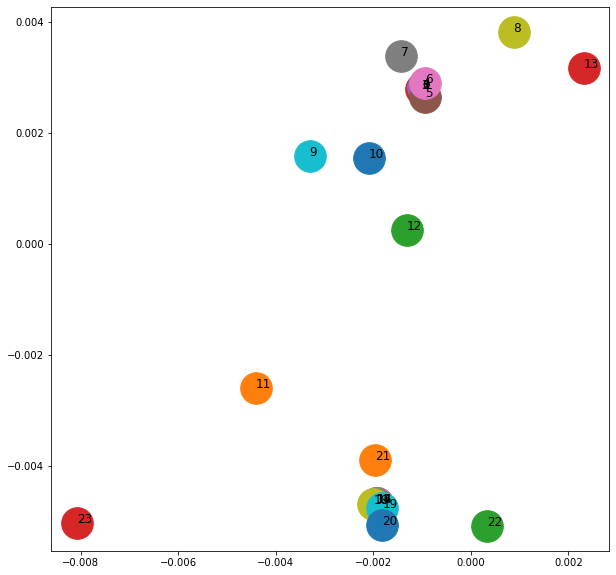

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = gf.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

In [37]:
gf = GraphFactorization(d=2,  data_set=None,max_iter=10000, eta=1*10**-4, regu=1.0)
gf.learn_embedding(G)

[Errno 2] No such file or directory: 'gem/c_exe/gf'
./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission
		Iter id: 0, Objective: 95.007, f1: 95.0028, f2: 0.00416708


(array([[-0.00100042,  0.0027991 ],
        [-0.00099787,  0.00279907],
        [-0.00100074,  0.00279749],
        [-0.00101316,  0.00279368],
        [-0.00098794,  0.00283771],
        [-0.00093376,  0.00264775],
        [-0.00093735,  0.00290007],
        [-0.00143563,  0.00339626],
        [ 0.0008755 ,  0.00382878],
        [-0.0033069 ,  0.00159184],
        [-0.00209776,  0.00155868],
        [-0.00440729, -0.00258091],
        [-0.00131357,  0.00026682],
        [ 0.00231992,  0.00318094],
        [-0.00193238, -0.00466311],
        [-0.00193185, -0.00466516],
        [-0.00193185, -0.00465785],
        [-0.00193548, -0.00465762],
        [-0.00199951, -0.00467604],
        [-0.0018172 , -0.00475156],
        [-0.00181634, -0.0050608 ],
        [-0.00197136, -0.0038937 ],
        [ 0.00032571, -0.00507837],
        [-0.00808494, -0.00501757]]),
 7.011725902557373)

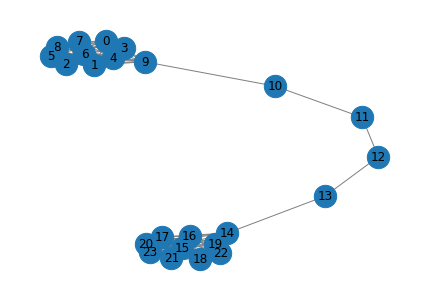

In [38]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.grarep import GraRep

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gr = GraRep(dimensions=2,order=3)
gr.fit(G)

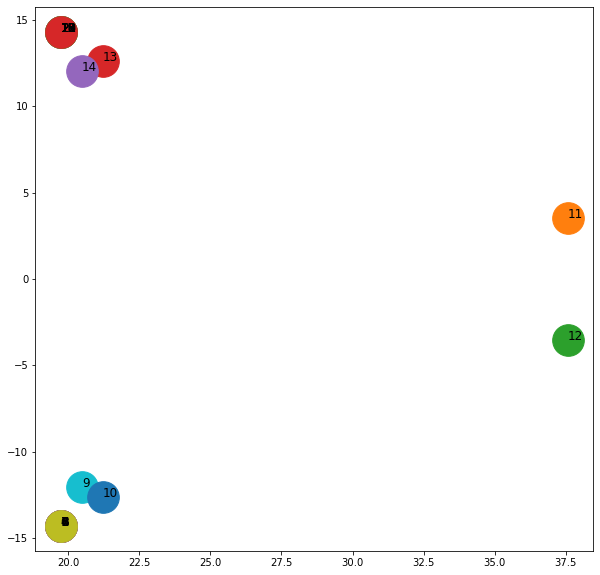

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ida = 4
idb = 5
for x in G.nodes():
    
    v = gr.get_embedding()[x]
    ax.scatter(v[ida],v[idb], s=1000)
    ax.annotate(str(x), (v[ida],v[idb]), fontsize=12)

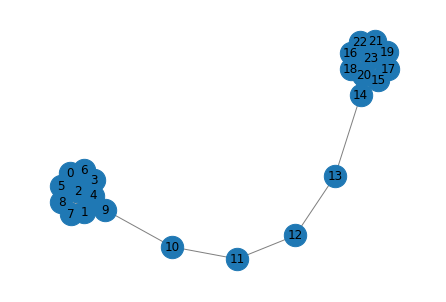

SVD error (low rank): 0.052092


(array([[-0.07024409, -0.07024348, -0.07024409, -0.07024348],
        [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
        [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
        [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
        [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
        [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
        [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
        [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
        [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
        [-0.07104037, -0.07104201, -0.07104037, -0.07104201],
        [-0.00797181, -0.00799433, -0.00797181, -0.00799433],
        [-0.00079628, -0.00099787, -0.00079628, -0.00099787],
        [ 0.00079628, -0.00099787,  0.00079628, -0.00099787],
        [ 0.00797181, -0.00799433,  0.00797181, -0.00799433],
        [ 0.07104037, -0.07104201,  0.07104037, -0.07104201],
        [ 0.07024409, -0.07024348,  0.07024409, -0.07024348],
        

In [24]:

import networkx as nx
from gem.embedding.hope import HOPE

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

hp = HOPE(d=4, beta=0.01)
hp.learn_embedding(G)

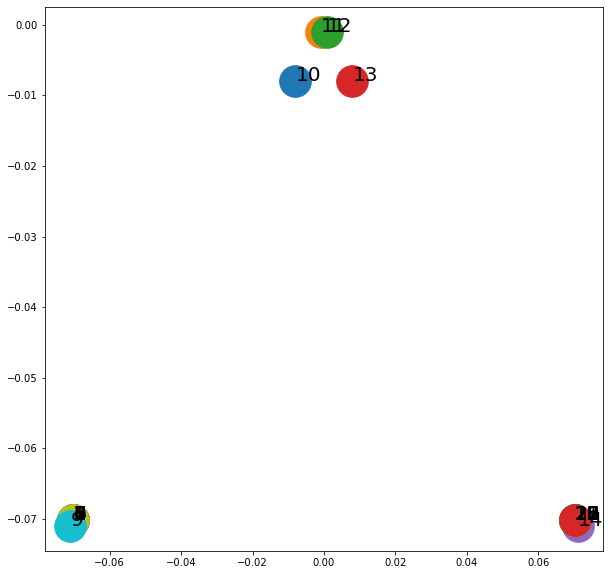

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = hp.get_embedding()[x,2:]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=20)

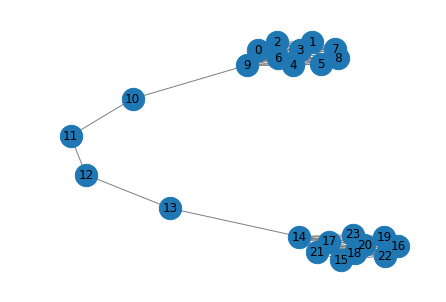

In [26]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.deepwalk import DeepWalk

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

dw = DeepWalk(dimensions=2)
dw.fit(G)

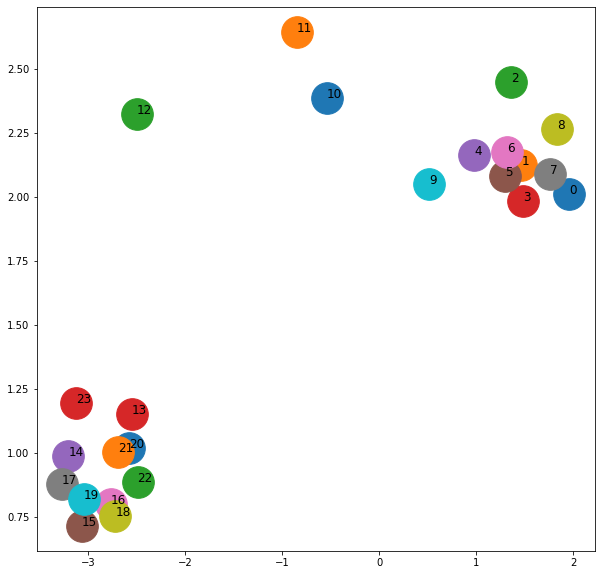

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = dw.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

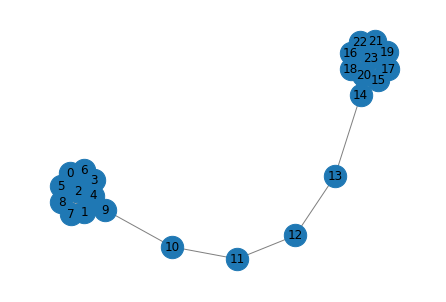

Computing transition probabilities:   0%|          | 0/24 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


In [28]:
import networkx as nx
from node2vec import Node2Vec

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)
embeddings = model.wv

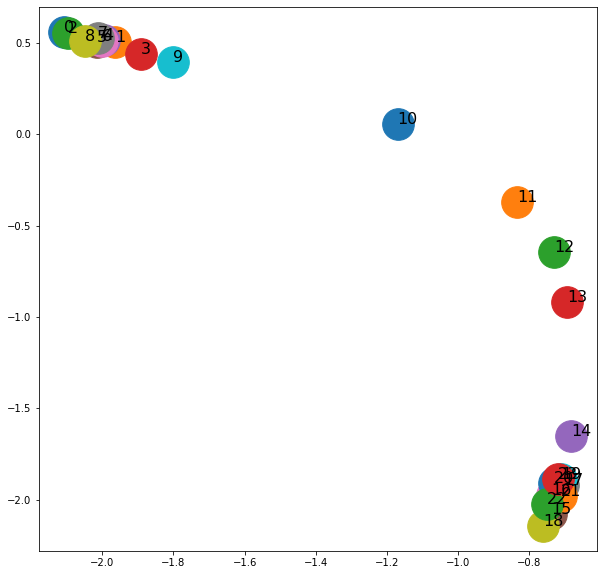

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = model.wv[str(x)]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

In [30]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

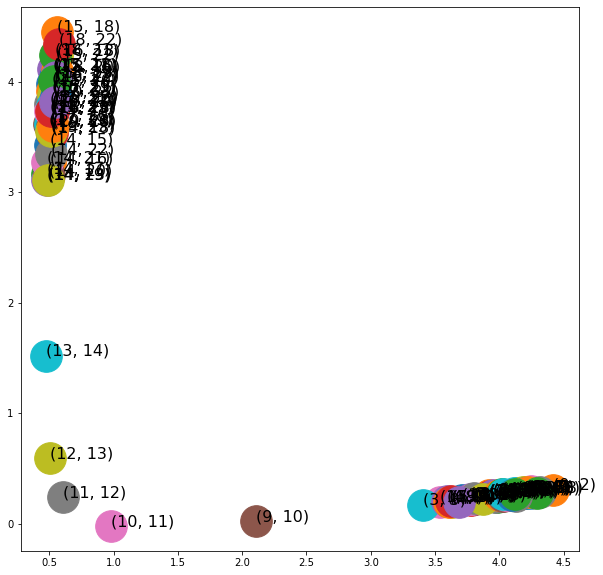

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

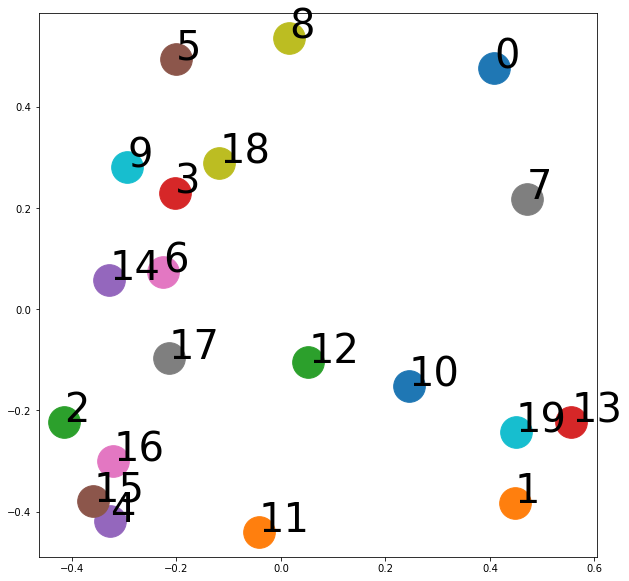

In [32]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(10,10))

for i,vec in enumerate(embeddings):
    
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)